In [3]:
# DAL Library
# version 2.1

source("../dal_transform.R")
source("../dal_fit.R")

In [4]:
wine <- get(load("wine.RData"))
head(wine)

,X1,X14.23,X1.71,X2.43,X15.6,X127,X2.8,X3.06,X.28,X2.29,X5.64,X1.04,X3.92,X1065
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290


## Example: PCA components
Cummulative variance of PCA: First dimensions have high variance. However, adding more dimensions does not bring much benefit in terms of cummulative variance. 
The goal is to establish a trade-off.

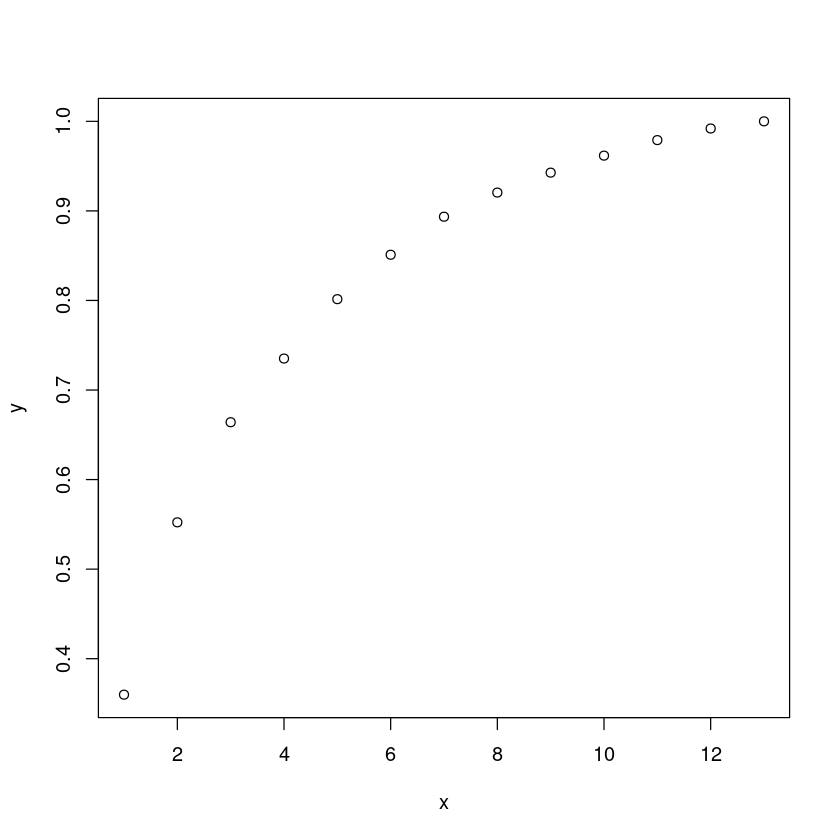

In [5]:
pca_res = prcomp(wine[,2:ncol(wine)], center=TRUE, scale.=TRUE)
y <- cumsum(pca_res$sdev^2/sum(pca_res$sdev^2))
x <- 1:length(y)
plot(x, y)

## Minimum curvature
If the curve is increasing, use minimum curvature analysis. 
It brings a trade-off between having lower x values (with not so high y values) and having higher x values (not having to much increase in y values). 

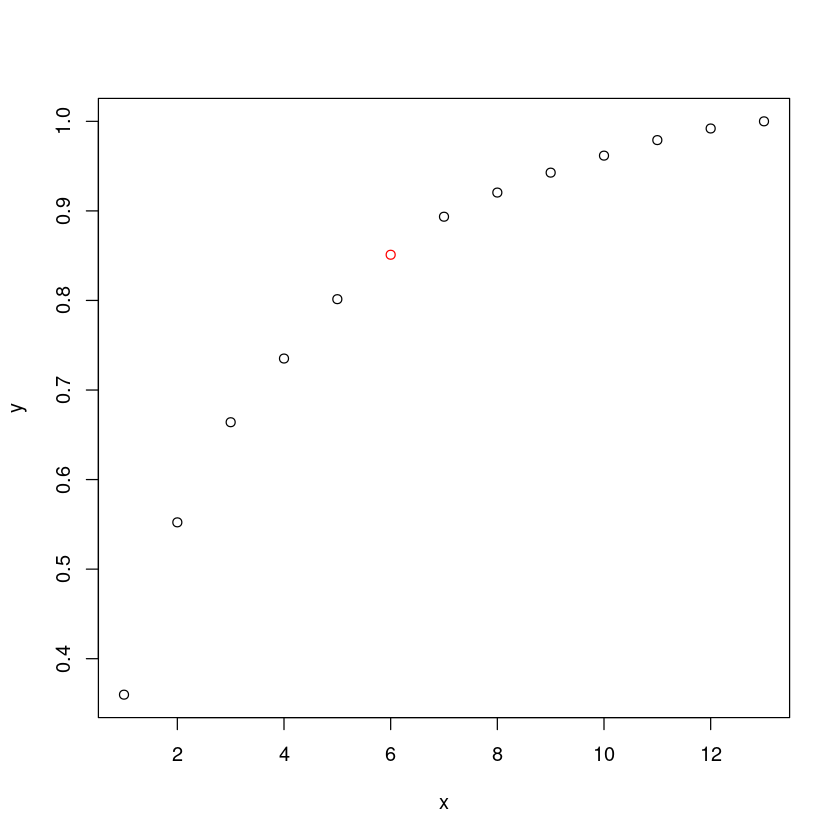

In [6]:
myfit <- fit_curvature_min()
res <- transform(myfit, y)
plot(myfit, y, res)

## Decreasing curve
Suppose the y values is continuously decreasing. 
The goal is to establish a trade-off with lower x values but with still higher values and higher x values but with not gaining benefits in y values. 

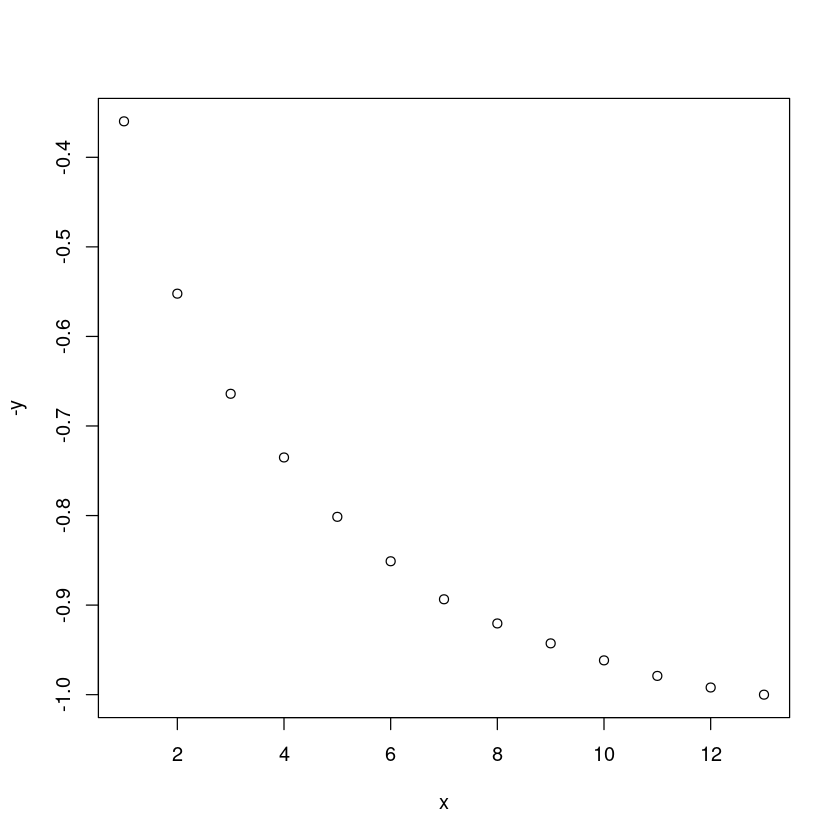

In [7]:
plot(x, -y)

## Maximum curvature
If the curve is decreasing, use maximum curvature analysis. 
It brings a trade-off between having lower x values (with not so low y values) and having higher x values (not having to much decrease in y values). 

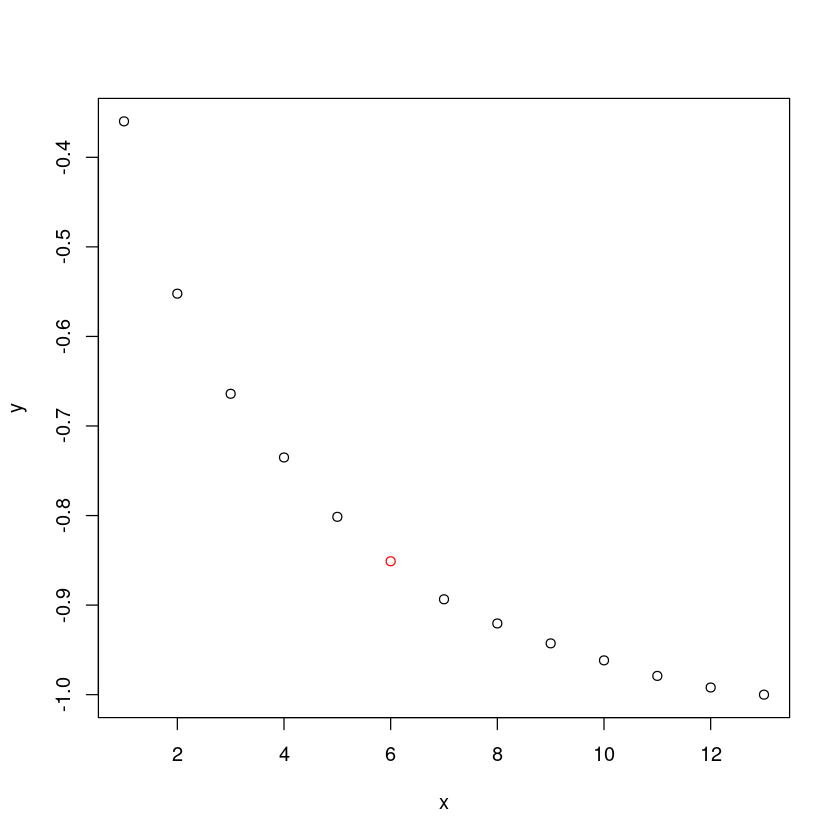

In [8]:
myfit <- fit_curvature_max()
res <- transform(myfit, -y)
plot(myfit, -y, res)